In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import accuracy_score
import torch
from tqdm import trange, tqdm
import torch.optim as optim
import time
from IPython import display

%matplotlib inline

# Загрузка датасета

In [2]:
df = pd.read_csv('data.csv', header=None)

# Разделение датасета на X и y, а также на тренировочную и тестовую части

In [3]:
X = df.drop(df.columns[1], axis=1)
y = df[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
X_train

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
10,845636,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,905190,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,907914,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,852781,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,854941,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,905686,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,9112594,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,911654,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [5]:
X_train.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.305657e+07,14.166077,19.417692,92.215868,659.578242,0.095993,0.103835,0.089184,0.049015,0.181497,...,16.351514,25.904879,107.860484,890.569231,0.132083,0.255529,0.275166,0.115491,0.291364,0.084124
std,1.325805e+08,3.579081,4.290653,24.717118,360.418686,0.014310,0.053910,0.081698,0.039686,0.027646,...,4.901037,6.079532,34.176019,582.346181,0.023481,0.158400,0.212066,0.066844,0.063043,0.018169
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.690515e+05,11.710000,16.335000,75.235000,420.400000,0.085130,0.063735,0.029520,0.019685,0.162050,...,13.020000,21.490000,84.135000,516.150000,0.114550,0.147750,0.119350,0.064075,0.251200,0.071365
50%,9.059780e+05,13.340000,18.900000,86.180000,546.400000,0.095240,0.092280,0.059400,0.033340,0.179900,...,14.920000,25.480000,97.650000,683.400000,0.131100,0.216700,0.229800,0.101000,0.282300,0.080090
75%,8.910502e+06,15.935000,21.830000,104.500000,795.500000,0.104900,0.130350,0.132200,0.074075,0.195400,...,19.185000,30.200000,127.000000,1122.500000,0.146600,0.338100,0.385700,0.162100,0.318700,0.092085
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 10 to 335
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       455 non-null    int64  
 1   2       455 non-null    float64
 2   3       455 non-null    float64
 3   4       455 non-null    float64
 4   5       455 non-null    float64
 5   6       455 non-null    float64
 6   7       455 non-null    float64
 7   8       455 non-null    float64
 8   9       455 non-null    float64
 9   10      455 non-null    float64
 10  11      455 non-null    float64
 11  12      455 non-null    float64
 12  13      455 non-null    float64
 13  14      455 non-null    float64
 14  15      455 non-null    float64
 15  16      455 non-null    float64
 16  17      455 non-null    float64
 17  18      455 non-null    float64
 18  19      455 non-null    float64
 19  20      455 non-null    float64
 20  21      455 non-null    float64
 21  22      455 non-null    float64
 22  2

# Визуализация данных

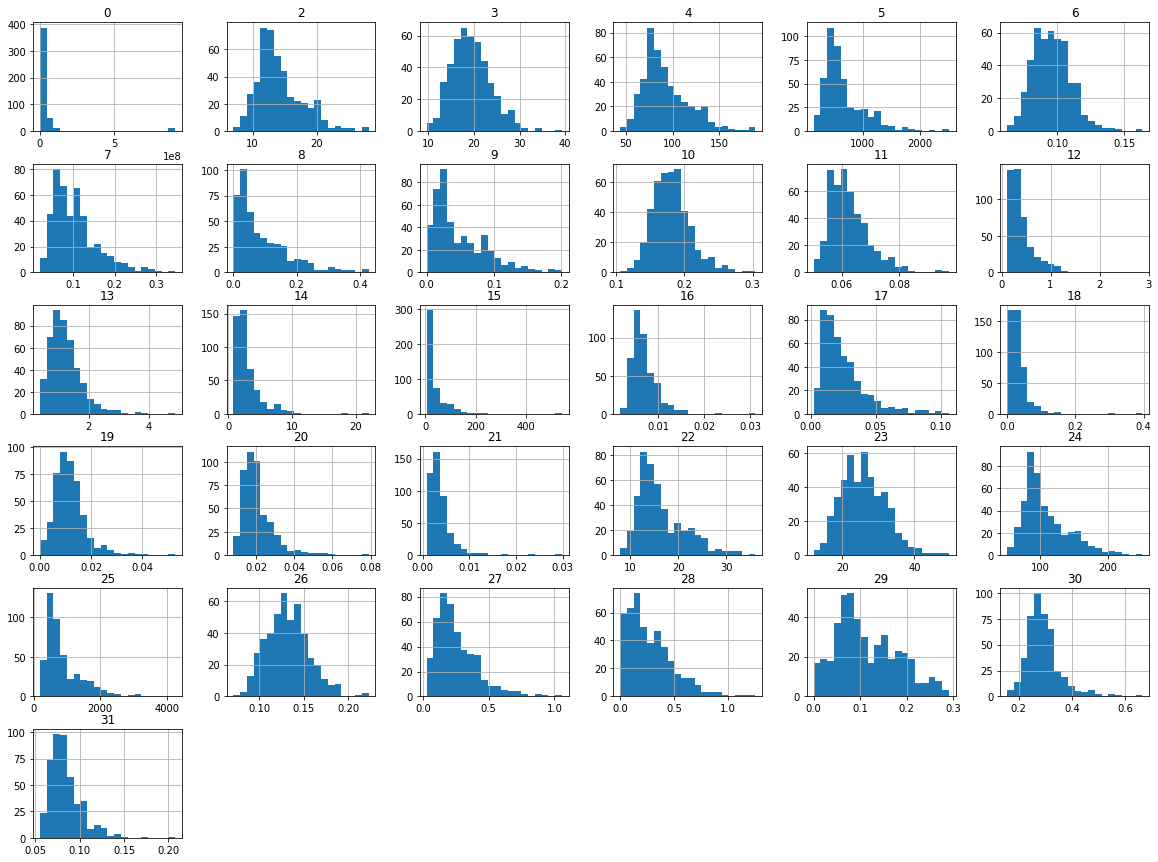

In [7]:
X_train.hist(bins=20, figsize=(20,15))
None

# Нормалиация данных

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.24322109,  0.51855873,  0.89182579, ..., -0.23574392,
         0.05456632,  0.02183673],
       [ 0.40837337, -0.51636409, -1.63971029, ..., -0.32320788,
        -0.13757624, -0.90440164],
       [-0.2427714 , -0.36811839,  0.45551496, ..., -0.89082504,
        -0.675893  , -0.14401559],
       ...,
       [-0.18079822, -0.32616206,  1.33280304, ..., -0.84289958,
        -0.96490082, -1.16888375],
       [-0.24272259,  0.00948859,  0.25952507, ...,  0.27571059,
        -0.60284707, -0.30545988],
       [ 0.42803134,  0.80945595,  0.36918608, ...,  1.00657384,
        -0.46151907, -0.44817001]])

# Поиск выбросов

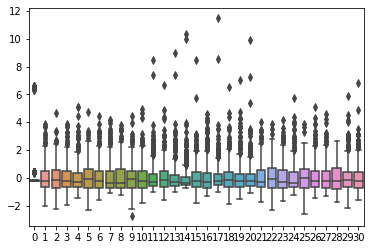

In [9]:
sns.boxplot(data=X_train_scaled)
None

## Фильтр для выбросов

Заменим выбросы на nan

In [10]:
def filtr_data_dump(data):
    for attr in data:
        q25, q75 = np.percentile(attr, [25, 75])
        delta_q = q75 - q25
        max = q75 + (1.5 * delta_q)
        min = q25 - (1.5 * delta_q)
        attr[attr < min] = np.nan
        attr[attr > max] = np.nan
    return data

class FiltrOutlier(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return filtr_data_dump(X)

In [11]:
filtr = FiltrOutlier()
X_train_scaled = filtr.fit_transform(X_train_scaled)
sum(np.isnan(X_train_scaled))

array([21,  1, 57,  1,  1, 46,  3,  0,  0, 41, 20,  6, 47,  5,  3, 49, 12,
        9,  8, 39, 10,  0, 57,  0,  0, 38,  5,  4,  0, 45, 11])

Так как выбросов много, то попробуем заменить пропуски на среднее значение каждого столбца соответсвенно

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_train_imputed

array([[-0.24322109,  0.51855873,  0.89182579, ..., -0.23574392,
         0.05456632,  0.02183673],
       [-0.14483215, -0.51636409, -0.07488649, ..., -0.32320788,
        -0.13757624, -0.90440164],
       [-0.2427714 , -0.36811839,  0.45551496, ..., -0.89082504,
        -0.675893  , -0.14401559],
       ...,
       [-0.18079822, -0.32616206, -0.07488649, ..., -0.84289958,
        -0.96490082, -1.16888375],
       [-0.24272259,  0.00948859,  0.25952507, ...,  0.27571059,
        -0.60284707, -0.30545988],
       [ 0.42803134,  0.80945595,  0.36918608, ...,  1.00657384,
        -0.46151907, -0.44817001]])

In [13]:
sum(np.isnan(X_train_imputed))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

# Поиск связей

In [14]:
X_train_df = pd.DataFrame(X_train_imputed)
corr_matrix = X_train_df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.000000,0.210724,0.152931,0.217127,0.259317,0.096734,0.139411,0.182396,0.185305,0.072184,...,0.233789,0.105227,0.239457,0.296440,0.067583,0.109739,0.132617,0.160469,0.050445,0.014152
1,0.210724,1.000000,0.441935,0.997823,0.986766,0.261680,0.523716,0.676643,0.827236,0.187236,...,0.969300,0.388987,0.964549,0.940637,0.180835,0.420056,0.525311,0.741333,0.164738,0.028503
2,0.152931,0.441935,1.000000,0.454581,0.434768,0.202658,0.412629,0.444569,0.452800,0.229233,...,0.476969,0.850282,0.493832,0.464673,0.232239,0.424316,0.449007,0.441580,0.253896,0.232220
3,0.217127,0.997823,0.454581,1.000000,0.985965,0.298817,0.571235,0.716216,0.855547,0.225919,...,0.969346,0.400068,0.970057,0.941144,0.211963,0.462701,0.562446,0.768159,0.195766,0.072127
4,0.259317,0.986766,0.434768,0.985965,1.000000,0.267035,0.515317,0.685647,0.827137,0.191219,...,0.960728,0.374314,0.956729,0.958196,0.182356,0.397061,0.510981,0.717828,0.146117,0.025965
5,0.096734,0.261680,0.202658,0.298817,0.267035,1.000000,0.677244,0.610042,0.617314,0.585412,...,0.312242,0.251870,0.340474,0.300437,0.754020,0.560732,0.540628,0.580814,0.522312,0.533167
6,0.139411,0.523716,0.412629,0.571235,0.515317,0.677244,1.000000,0.880246,0.837481,0.622040,...,0.559358,0.392609,0.612271,0.531305,0.605681,0.867830,0.823611,0.828292,0.550370,0.689087
7,0.182396,0.676643,0.444569,0.716216,0.685647,0.610042,0.880246,1.000000,0.920598,0.572125,...,0.688777,0.403616,0.731725,0.675319,0.495597,0.767455,0.885001,0.857881,0.469997,0.537430
8,0.185305,0.827236,0.452800,0.855547,0.827137,0.617314,0.837481,0.920598,1.000000,0.510838,...,0.838067,0.423168,0.864362,0.815747,0.492622,0.685771,0.758753,0.912250,0.433765,0.396393
9,0.072184,0.187236,0.229233,0.225919,0.191219,0.585412,0.622040,0.572125,0.510838,1.000000,...,0.231857,0.249148,0.271589,0.220943,0.501217,0.552256,0.515805,0.480811,0.682384,0.512218


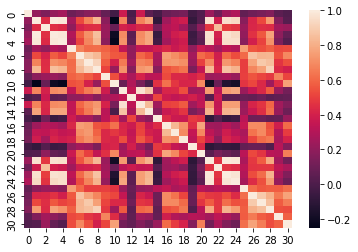

In [15]:
sns.heatmap(corr_matrix)
None

# Снизим размерность датасета

In [16]:
pca = PCA(n_components=0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train_df))
X_train_reduced

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.670149,-2.367531,-0.694563,1.546046,1.020013,0.297107,0.431393,0.272947,0.344455,-0.689585,-0.558477,0.108213
1,-2.216137,-0.163760,-0.343737,0.181271,-0.621907,-0.136464,-0.633441,-0.516158,0.270868,0.030955,0.245912,0.809468
2,-1.026699,0.584125,1.617166,0.730986,0.959860,-0.361100,-0.185206,0.091335,0.563238,-0.241926,0.503494,-0.736742
3,4.974921,3.326955,-1.395329,-1.537734,2.691250,-0.395612,-0.517535,-0.556464,-0.382051,0.772138,0.375741,0.318845
4,3.056823,-1.844085,2.547601,0.263043,0.031686,-1.146824,-0.331515,-0.199979,0.733110,0.294556,-0.334005,-0.299460
...,...,...,...,...,...,...,...,...,...,...,...,...
450,-3.682285,-1.671442,0.629098,-0.318786,0.547903,-0.452404,-0.655015,-0.223053,-0.524858,-1.043436,0.260963,0.223010
451,-1.745400,1.111204,0.342029,1.274769,-0.744596,0.044652,-0.670420,0.113354,0.347158,0.752577,-0.030213,0.476060
452,-3.252298,-1.738529,-0.039388,0.664855,0.102677,-0.418572,-0.196366,-0.241869,-0.187309,0.481529,-0.167420,-0.046063
453,-0.439331,-0.706809,-0.324096,-0.225826,1.524504,-0.090350,0.209486,-0.399441,0.230690,-0.440743,0.346479,-0.160476


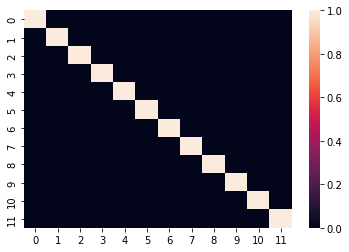

In [17]:
sns.heatmap(X_train_reduced.corr())
None

# Конвееры трансформации

In [18]:
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('filter_outlier', FiltrOutlier()),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('pca', PCA(n_components=12))
])
X_train_preproc = pd.DataFrame(pipeline.fit_transform(X_train))
X_train_preproc

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.670149,-2.367531,-0.694563,1.546046,1.020013,0.297107,0.431393,0.272947,0.344455,-0.689585,-0.558477,0.108213
1,-2.216137,-0.163760,-0.343737,0.181271,-0.621907,-0.136464,-0.633441,-0.516158,0.270868,0.030955,0.245912,0.809468
2,-1.026699,0.584125,1.617166,0.730986,0.959860,-0.361100,-0.185206,0.091335,0.563238,-0.241926,0.503494,-0.736742
3,4.974921,3.326955,-1.395329,-1.537734,2.691250,-0.395612,-0.517535,-0.556464,-0.382051,0.772138,0.375741,0.318845
4,3.056823,-1.844085,2.547601,0.263043,0.031686,-1.146824,-0.331515,-0.199979,0.733110,0.294556,-0.334005,-0.299460
...,...,...,...,...,...,...,...,...,...,...,...,...
450,-3.682285,-1.671442,0.629098,-0.318786,0.547903,-0.452404,-0.655015,-0.223053,-0.524858,-1.043436,0.260963,0.223010
451,-1.745400,1.111204,0.342029,1.274769,-0.744596,0.044652,-0.670420,0.113354,0.347158,0.752577,-0.030213,0.476060
452,-3.252298,-1.738529,-0.039388,0.664855,0.102677,-0.418572,-0.196366,-0.241869,-0.187309,0.481529,-0.167420,-0.046063
453,-0.439331,-0.706809,-0.324096,-0.225826,1.524504,-0.090350,0.209486,-0.399441,0.230690,-0.440743,0.346479,-0.160476


In [19]:
target_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder())
])
y_train_preproc = target_pipeline.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_train_preproc.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

# Реализация многослойного перцептрона

In [20]:
class Module(object):
    """
        Абстрактный класс для слоев нейросети.

        Как и описано в "Проектирование фреймворка":

        - во время forward просто вычисляет операцию слоя:

            `output = module.forward(input)`

        - во время backward дифференцирует функцию слоя по входу и по параметрам,
          возвращает градиент по входу этого слоя (для удобства):

            `grad_input = module.backward(input, grad_output)`
    """
    
    def __init__ (self):
        self.output = None
        self.grad_input = None
    
    def forward(self, input):
        """
        Вычисляет операцию слоя.
        
        Вход: 
            `input (np.array)` -- вход слоя  
        Выход: 
            `self.update_output(input) (np.array)` -- вычисленная операция слоя
        """
        
        return self.update_output(input)

    def backward(self, input, grad_output):
        """
        Осуществляет шаг backpropagation'а для этого слоя,
        дифференцируя функцию слоя по входу и по параметрам.
        
        Обратите внимание, что градиент зависит и от параметров, от входа input.
        
        Вход: 
            `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        Выход: 
            `self.grad_input (np.array)` -- градиент функции слоя по входу
        """
        
        self.update_grad_input(input, grad_output)
        self.update_grad_params(input, grad_output)
        return self.grad_input
    
    def update_output(self, input):
        """
        Конкретная реализация `forward()` для данного слоя.
        Вычисляет функцию слоя (линейную, `ReLU`, `SoftMax`) по входу `input`.
        
        Вход: 
            `input (np.array)` -- вход слоя
        Выход: 
            `self.output (np.array)` -- вычисленная операция слоя, сохраненная в поле класса 
            
        Важно! не забывайте как возвращать `self.output`, так и сохранять результат в это поле 
        """
        
        pass

    def update_grad_input(self, input, grad_output):
        """
        Вычисляет градиент функции слоя по входу `input` и возвращает его в виде `self.grad_input`.
        Размер (`shape`) поля `self.grad_input` всегда совпадает с размером `input`.
        
        Вход: 
            `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        Выход: 
            `self.grad_input (np.array)` -- вычисленный градиент функции слоя по входу `input`
        
        Важно! не забывайте как возвращать `self.grad_input`, так и сохранять результат в это поле 
        """
        
        pass   
    
    def update_grad_params(self, input, grad_output):
        """
        Вычисляет градиент функции слоя по параметрам (весам) этого слоя. 
        Ничего не возвращает, только сохраняет значения градиентов в соответствующие поля.
        Не нужно реализовывать этот метод, если у слоя нет параметров (у функций активации, 
        `SoftMax`, `LogSoftMax`, `MaxPool2d`).
        
        Вход: 
           `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        """
        
        pass
    
    def zero_grad_params(self): 
        """
        Обнуляет градиенты у параметров слоя (если они есть).
        Нужно для оптимизатора.
        """
        
        pass
        
    def get_parameters(self):
        """
        Возвращает список параметров этого слоя, если они есть. Иначе вернуть пустой список. 
        Нужно для оптимизатора.
        """
        
        return []
        
        
    def get_grad_params(self):
        """
        Возвращает список градиентов функции этого слоя по параметрам этого слоя, если они есть. 
        Иначе вернуть пустой список. 
        Нужно для оптимизатора.
        """
        
        return []
    
    
    def __repr__(self):
        """
        Напечатать название слоя КРАСИВО.
        """
        
        return 'Module'

In [21]:
class Sequential(Module):
    """
        Этот класс является последовательностью модулей (слоев). 
        Последовательно обрабатывает вход `input` от слоя к слою.
        
        Обратите внимание, он тоже наследуется от `Module`
    """
    
    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []
   
    def add(self, module):
        """
        Добавляет модуль в контейнер.
        """
        
        self.modules.append(module)

    def update_output(self, input):
        """
        Соответствуя разделу "Проектирование фреймворка":
        
            O_0    = module[0].forward(input)
            O_1    = module[1].forward(O_0)
            ...
            output = module[n-1].forward(O_{n-2})   
             
        Нужно просто написать соответствующий цикл. 
        """
        
        self.output = [input]
        
        for module in self.modules:
          self.output.append(module.forward(self.output[-1]))

        return self.output[-1]

    def backward(self, input, grad_output):
        """
        Соответствуя разделу "Проектирование фреймворка":
            
            g_{n-1} = module[n-1].backward(O_{n-2}, grad_output)
            g_{n-2} = module[n-2].backward(O_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(O_0, g_2)   
            grad_input = module[0].backward(input, g_1)
            
        """
        self.grad_input = [grad_output]
        
        for i in range(len(self.modules) - 1, -1, -1):
          self.grad_input.append(self.modules[i].backward(self.output[i], self.grad_input[-1]))
        
        return self.grad_input[-1]
      

    def zero_grad_params(self): 
        for module in self.modules:
            module.zero_grad_params()
    
    def get_parameters(self):
        """
        Собирает параметры каждого слоя в один список, получая список списков.
        """
        
        return [x.get_parameters() for x in self.modules]
    
    def get_grad_params(self):
        """
        Собирает градиенты параметров каждого слоя в один список, получая список списков.
        """
        
        return [x.get_grad_params() for x in self.modules]
    
    def __repr__(self):
        """
        Напечатать названия слоев КРАСИВО.
        """
        string = "".join([str(x) + '\n' for x in self.modules])
        return string
    
    def __getitem__(self,x):
        return self.modules.__getitem__(x)

In [22]:
class Linear(Module):
    """
    Слой, осуществляющий линейное преобразование
    """
    def __init__(self, n_in, n_out):
        '''
        Поля:
            W - матрица весов слоя размера (n_in, n_out); 
                в данном случае n_in равно числу признаков, 
                а n_out равно количеству нейронов в слое
            b - вектор свободных членов, по одному числу на один нейрон
            gradW - хранит градиент матрицы весов линейного слоя
            gradb - хранит градиент вектора свободных членов
        '''
        super(Linear, self).__init__()
       
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size=(n_in, n_out))
        self.b = np.random.uniform(-stdv, stdv, size=n_out)
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def update_output(self, input):
        """
        Вход:
            `input (np.array)` -- вход слоя
        """

        self.output = input @ self.W + self.b
        
        return self.output
    
    def update_grad_input(self, input, grad_output):
        """
        Вход:
            `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        """
        
        self.grad_input = grad_output @ self.W.T
        
        return self.grad_input
    
    def update_grad_params(self, input, grad_output):
        """
        Вход:
            `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        """
        
        self.gradW = input.T @ grad_output
        self.gradb = grad_output.sum(axis = 0)
        
        assert self.gradb.shape == self.b.shape
    
    def zero_grad_params(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def get_parameters(self):
        return [self.W, self.b]
    
    def get_grad_params(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = f'Linear {s[0]} -> {s[1]}'
        return q

In [23]:
class SoftMax(Module):
    def __init__(self):
         super(SoftMax, self).__init__()

    def update_output(self, input):
        """
        Вход:
            `input (np.array)` -- вход слоя
        """
        
        input_clamp = input - input.max(axis=1, keepdims=True)
        output = np.exp(input_clamp)
        self.output = output / np.sum(output, axis=1).reshape(-1, 1)
        
        return self.output
    
    def update_grad_input(self, input, grad_output):
        """
        Вход:
            `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        """
        input_clamp = input - input.max(axis=1, keepdims=True)
        output = np.exp(input_clamp)
        output = output / np.sum(output, axis=1).reshape(-1, 1)

        help_arr = output * grad_output
        self.grad_input = help_arr - output * np.sum(help_arr, axis = 1).reshape(-1, 1)

        return self.grad_input
    
    def __repr__(self):
        return 'SoftMax'

In [24]:
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()
    
    def update_output(self, input):
        """
        Вход:
            `input (np.array)` -- вход слоя
        """
        # нормализуем для численной устойчивости
        self.output = input - input.max(axis=1, keepdims=True)
        self.output = self.output - np.log(np.sum(np.exp(self.output), axis=1)).reshape(-1, 1)
        return self.output 
    
    def update_grad_input(self, input, grad_output):
        """
        Вход:
            `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        """
        input_clamp = input - input.max(axis=1, keepdims=True)
        output = np.exp(input_clamp)
        output = output / np.sum(output, axis=1).reshape(-1, 1)

        self.grad_input = grad_output
        self.grad_input -= output * np.sum(grad_output, axis=1).reshape(-1, 1)
        
        return self.grad_input

    def __repr__(self):
        return 'LogSoftMax'

In [25]:
class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()
    
    def update_output(self, input):
        """
        Вход:
            `input (np.array)` -- вход слоя
        """
        self.output = input
        self.output[self.output <= 0] = 0
        
        return self.output
    
    def update_grad_input(self, input, grad_output):
        """
        Вход:
            `input (np.array)` -- вход слоя
            `grad_output (np.array)` -- градиент по выходу этого слоя, пришедший от следующего слоя
        """
        input_copy = input.copy()
        input_copy[input_copy > 0] = 1
        self.grad_input = grad_output * input_copy
        
        return self.grad_input
    
    def __repr__(self):
        return 'ReLU'

In [26]:
class Criterion(object):
    def __init__ (self):
        self.output = None
        self.grad_input = None
        
    def forward(self, input, target):
        """
        Вычисляет функцию потерь по входу `input` и истинными значениями `target`.

        Вход: 
            `input (np.array)` -- вход слоя  
            `target (np.array)` -- истинные ответы
        Выход: 
            `self.update_output(input, target) (np.array)` -- вычисленная функция потерь
        """
        return self.update_output(input, target)

    def backward(self, input, target):
        """
        Вычисляет градиент функции потерь по входу `input`.
        Использует для этого также истинные значения `target`.

        Вход: 
            `input (np.array)` -- вход слоя  
            `target (np.array)` -- истинные ответы
        Выход: 
            `self.update_grad_input(input, target) (np.array)` -- вычисленный градиент по входу `input`
        """
        return self.update_grad_input(input, target)
    
    def update_output(self, input, target):
        """
        Фунция, реализующая `forward()`
        """
        return self.output

    def update_grad_input(self, input, target):
        """
        Фунция, реализующая `backward()`
        """
        return self.grad_input   

    def __repr__(self):
        """
        Напечатать название слоя КРАСИВО.
        """
        return 'Criterion'

In [27]:
class NLLCriterion(Criterion):
    def __init__(self):
        a = super(NLLCriterion, self)
        super(NLLCriterion, self).__init__()
        
    def update_output(self, input, target):
        """
        Вход:
            `input (np.array)` -- вход слоя  
            `target (np.array)` -- истинные ответы
        """
        
        self.output = -((target *input).sum())/target.shape[0]
        
        return self.output

    def update_grad_input(self, input, target):
        """
        Вход:
            `input (np.array)` -- вход слоя  
            `target (np.array)` -- истинные ответы
        """
        
        self.grad_input = -(target)/(target.shape[0])
         
        return self.grad_input
    
    def __repr__(self):
        return 'NLLCriterion'

In [28]:
def SGD(variables, gradients, config, state):  
    '''
    Реализация метода стохастического градиентого спуска с momentum.
    Обновляет значения переменных в соответствии с их градиентами и сохраняет градиенты в state.
    
    Вход:
        `variables` - список (`list`) списков переменных, которые нужно обновить 
         (один список для одного слоя)
        `gradients` - список (`list`) списков градиентов этих переменных 
         (ровно та же структура, как и у `variables`, один список для одного слоя)
        `config` - словарь (`dict`) c гиперпараметрами оптимизатора 
         (сейчас это только `learning_rate`)
        `state` -  словарь (`dict`) c состоянием (`state`) оптимизатора 
         (нужен, чтобы сохранять старые значения градиентов для `momentum`)
    Выход:
        Ничего не возвращает. Обновляет значения градиентов 
    '''
    
    n = len(variables)
    for i in range(n):
      m = len(variables[i])
      for j in range(m):
        variables[i][j] -= gradients[i][j] * config['learning_rate']

In [29]:
def train_generator(sample, labels, batch_size):
    '''
    Генератор батчей. 
    На каждом шаге возвращает `batch_size` объектов из `sample` и их 
    меток из `labels`.
    '''
    n_samples = sample.shape[0]
    # Перемешиваем в случайном порядке в начале эпохи
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    # Обратите внимание на yield вместо return
    # (если раньше не сталкивались с генераторами)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx], labels[batch_idx]

In [30]:
def train_model(
    model, 
    sample, y,
    criterion,
    opt_params, 
    opt_state, 
    n_epoch, 
    batch_size
):
    '''
    Обучает модель из вашего мини-фреймворка. 
    Возвращает обученную модель, историю значений функции потерь 
    и метрики качества.
    
    :param `model`: модель из вашего мини-фреймворка
    :param `sample`: матрица объектов
    :param `y`: вектор истинных меток объектов
    :param `criterion`: функция потерь
    :param `opt_params`: гиперпараметры оптимизатора
    :param `opt_state`: текущая информация о градиентах, 
                        хранящаяся в оптимизаторе
    :param `n_epoch`: количество эпох
    :param `batch_size`: размер одного батча
    '''
    
    loss_history = []
    accuracy_history = []

    for i in tqdm(range(n_epoch)):
        for x_batch, y_batch in train_generator(sample, y, batch_size):
            # Обнуляем градиенты с предыдущей итерации
            model.zero_grad_params()

            # Forward pass
            predictions = model.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
            val_loss = 1 - accuracy_score(np.argmax(predictions, axis=1), np.argmax(y_batch, axis=1))
            # Backward pass
            grad_last = criterion.backward(predictions, y_batch)
            model.backward(x_batch, grad_last)
            
            # Обновление весов
            SGD(model.get_parameters(), 
                model.get_grad_params(), 
                opt_params,
                opt_state)
            loss_history.append(loss)
            accuracy_history.append(1-loss)

        display.clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.title("Loss")
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.plot(loss_history, 'b', label='loss')
        plt.plot(accuracy_history, 'r', label='fit')
        plt.legend()
        plt.show()
        print(f'epoch {i+1}/{n_epoch} - loss: {loss} - val_loss: {val_loss}')
    
    return model, loss_history

In [31]:
n_samples = 12
n_classes = 2
mlp = Sequential()
mlp.add(Linear(n_samples, 100))
mlp.add(ReLU())
mlp.add(Linear(100, 150))
mlp.add(ReLU())
mlp.add(Linear(150, 100))
mlp.add(ReLU())
mlp.add(Linear(100, n_classes))
mlp.add(LogSoftMax())
print(mlp)


Linear 12 -> 100
ReLU
Linear 100 -> 150
ReLU
Linear 150 -> 100
ReLU
Linear 100 -> 2
LogSoftMax



In [32]:
# Функция потерь
criterion = NLLCriterion()

# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 0.1}
optimizer_state = {}

# Гиперпараметры цикла обучения и генератора
n_epoch = 150
batch_size = 180

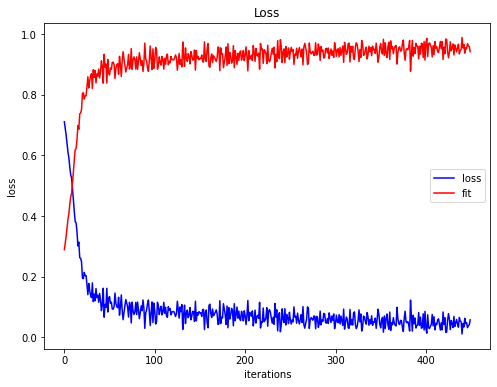

100%|██████████| 150/150 [00:50<00:00,  2.99it/s]

epoch 150/150 - loss: 0.0574662723259636 - val_loss: 0.010526315789473717


In [33]:
net, loss_history = train_model(
    mlp, 
    X_train_preproc.to_numpy(), y_train_preproc.toarray(), 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

In [43]:
def generate_grid(sample, h=0.02):
    '''
    Генерирует двумерную сетку.
    '''
    x_min, x_max = sample[:, 0].min() - .5, sample[:, 0].max() + .5
    y_min, y_max = sample[:, 1].min() - .5, sample[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def test_generator(sample):
    '''
    Батч-генератор для тестовых данных (без меток).
    '''
    n_samples = sample.shape[0]
    indices = np.arange(n_samples)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx]

def test_model(model, test_sample):
    '''
    Тестирует модель на тестовой выборке.
    '''
    preds = []
    for test_batch in test_generator(test_sample):
        batch = model.forward(test_batch)
        preds.append(batch)
    preds = np.vstack(preds)
    return preds

In [51]:
X_test_preproc = pipeline.fit_transform(X_test)
y_test_preproc = target_pipeline.fit_transform(y_test.to_numpy().reshape(-1, 1))
test_predictions = test_model(net, X_test_preproc)

array([[-2.43552493e-03, -6.01881048e+00],
       [-2.51401608e+01, -1.20716770e-11],
       [-1.31587667e-02, -4.33723924e+00],
       [-7.10947271e-01, -6.75658400e-01],
       [-1.03123847e-02, -4.57956147e+00],
       [-2.37868412e-05, -1.06463899e+01],
       [-1.48778107e-01, -1.97876623e+00],
       [-1.28846376e-03, -6.65494882e+00],
       [-1.27641210e-02, -4.36749237e+00],
       [-2.85099070e-03, -5.86151389e+00],
       [-8.60106891e+00, -1.83926020e-04],
       [-2.60130654e-05, -1.05569246e+01],
       [-2.00303042e+01, -1.99962890e-09],
       [-1.95889015e-02, -3.94257059e+00],
       [-5.92076164e-02, -2.85616284e+00],
       [-2.03475554e-05, -1.08025600e+01],
       [-1.50040971e-01, -1.97092953e+00],
       [-2.65079936e-03, -5.93421914e+00],
       [-3.74135328e-01, -1.16437977e+00],
       [-1.76034560e-04, -8.64491824e+00],
       [-9.37153278e-04, -6.97313225e+00],
       [-1.55074603e-03, -6.46979443e+00],
       [-1.94965871e+01, -3.40988548e-09],
       [-1.

In [52]:
accuracy_score(np.argmax(test_predictions, axis=1), np.argmax(y_test_preproc, axis=1))

0.9736842105263158